# 데이터 불러오기

In [8]:
import pandas as pd
import numpy as np
import os
df = pd.read_csv('../data/전처리완료.csv', encoding='CP949', low_memory=False)

df = df.drop(['증정강조','예약구매'], axis=1)

df['기저귀단계'] = df['기저귀단계'].fillna('알수없음')
df['남아여아공용'] = df['남아여아공용'].fillna('알수없음')

df = df.dropna()

df['주문번호'] = df['주문번호'].astype(str)
df['고객번호'] = df['고객번호'].astype(str)

df['배송완료일'] = pd.to_datetime(df['배송완료일'], format='%Y-%m-%d', errors='coerce')
df['배송시작일'] = pd.to_datetime(df['배송시작일'], format='%Y-%m-%d', errors='coerce')
df['구매일'] = pd.to_datetime(df['구매일'], format='%Y-%m-%d', errors='coerce')
df['마지막구매일'] = pd.to_datetime(df['마지막구매일'], format='%Y-%m-%d', errors='coerce')

df = df[df['결제금액'] >= 0].reset_index(drop=True)

df['물품대분류'] = df['물품대분류'].astype('category')
df['성별'] = df['성별'].astype('category')
df['결혼유무'] = df['결혼유무'].astype('category')
df['거주지역'] = df['거주지역'].astype('category')
df['결제등록카드'] = df['결제등록카드'].astype('category')
df['유입경로'] = df['유입경로'].astype('category')
df['자녀여부'] = df['자녀여부'].astype('category')
df['기저귀단계'] = df['기저귀단계'].astype('category')
df['남아여아공용'] = df['남아여아공용'].astype('category')
df['브랜드'] = df['브랜드'].astype('category')
df['원플원'] = df['원플원'].astype('category')
df['핫딜'] = df['핫딜'].astype('category')
df['쿠폰적용가강조'] = df['쿠폰적용가강조'].astype('category')
df['무료배송강조'] = df['무료배송강조'].astype('category')
df['기저귀밴드/팬티'] = df['기저귀밴드/팬티'].astype('category')
df['아이정보건너뛰기'] = df['아이정보건너뛰기'].astype('category')

df['구매시월령_bin'] = df['구매시월령_bin'].astype('category')
df['고객등급'] = df['고객등급'].astype('category')
df['등급별혜택_상품쿠폰'] = df['등급별혜택_상품쿠폰'].astype('category')
df['등급별혜택_쇼핑지원금'] = df['등급별혜택_쇼핑지원금'].astype('category')
df['등급별혜택_무료배송쿠폰'] = df['등급별혜택_무료배송쿠폰'].astype('category')
df['이탈등급'] = df['이탈등급'].astype('category')
df['당일출고서비스유무'] = df['당일출고서비스유무'].astype('category')
df['배송시작일_year'] = df['배송시작일_year'].astype('category')
df['배송시작일_month'] = df['배송시작일_month'].astype('category')
df['배송시작일_day'] = df['배송시작일_day'].astype('category')

# 가설 검정

### 가설1 : 자사브랜드를 주문했을 때, 당일출고서비스가 시작되고 배송이 더 빨라졌을 것이다. -> 유의X  
자사브랜드 : 하기스 그린핑거 포레스트 좋은느낌 화이트 디펜드 굿나이트 크리넥스 스카트 뽀삐
당일출고서비스가 시작되고 미세하게 배송일의 평균이 더 높아진 것으로 보아 아닌 듯  
오히려 3일 이내 배송 건수도 줄어듦

In [8]:
df['출고소요시간'] = df['배송시작일']-df['구매일']
자사브랜드 = '하기스 그린핑거 포레스트 좋은느낌 화이트 디펜드 굿나이트 크리넥스 스카트 뽀삐'.split()

df['출고소요시간'] = (df['배송시작일']-df['구매일']).dt.days

print('[자사브랜드]')
display(df[df['브랜드'].isin(자사브랜드)].groupby('당일출고서비스유무')[['주문일로부터배송완료시간','택배이동기간','출고소요시간']].mean())

print('\n[자사브랜드 외]')
df[~df['브랜드'].isin(자사브랜드)].groupby('당일출고서비스유무')[['주문일로부터배송완료시간','택배이동기간','출고소요시간']].mean()

[자사브랜드]


,주문일로부터배송완료시간,택배이동기간,출고소요시간
당일출고서비스유무,,,
당일출고 서비스 시작 전,3.719902,2.719902,1.0
당일출고 서비스 시작 후,3.732596,2.732596,1.0



[자사브랜드 외]


,주문일로부터배송완료시간,택배이동기간,출고소요시간
당일출고서비스유무,,,
당일출고 서비스 시작 전,3.707795,2.707795,1.0
당일출고 서비스 시작 후,3.732867,2.732867,1.0


In [7]:
df['출고소요시간'] = df['배송시작일']-df['구매일']
자사브랜드 = '하기스 그린핑거 포레스트 좋은느낌 화이트 디펜드 굿나이트 크리넥스 스카트 뽀삐'.split()

df['출고소요시간'] = (df['배송시작일']-df['구매일']).dt.days

print('[자사브랜드]')
display(pd.DataFrame(df[df['브랜드'].isin(자사브랜드)].groupby('당일출고서비스유무')[['주문일로부터배송완료시간']].value_counts(normalize=True)))

print('\n[자사브랜드 외]')
pd.DataFrame(df[~df['브랜드'].isin(자사브랜드)].groupby('당일출고서비스유무')[['주문일로부터배송완료시간']].value_counts(normalize=True))

[자사브랜드]


proportion
당일출고서비스유무     주문일로부터배송완료시간            
당일출고 서비스 시작 전 3               0.524490
              4               0.279792
              5               0.154061
              6               0.034637
              7               0.007019
당일출고 서비스 시작 후 3               0.520107
              4               0.277163
              5               0.159895
              6               0.035697
              7               0.007138


[자사브랜드 외]


proportion
당일출고서비스유무     주문일로부터배송완료시간            
당일출고 서비스 시작 전 3               0.532890
              4               0.271103
              5               0.157224
              6               0.032890
              7               0.005894
당일출고 서비스 시작 후 3               0.519766
              4               0.277839
              5               0.159793
              6               0.034968
              7               0.007634

In [16]:
import pandas as pd
import numpy as np

# 배송일 구간화
cols = ['주문일로부터배송완료시간', '택배이동기간', '출고소요시간']

for c in cols:
    # 1) 숫자형이면 그대로 사용
    if pd.api.types.is_numeric_dtype(df[c]):
        days = df[c]

    # 2) timedelta 형식이면 초 단위 → 일 단위 변환
    elif pd.api.types.is_timedelta64_dtype(df[c]):
        days = df[c].dt.total_seconds() / 86400

    # 3) 문자열이면 to_timedelta 후 변환
    else:
        days = pd.to_timedelta(df[c], errors='coerce').dt.total_seconds() / 86400

    # 4) 구간화 컬럼 생성
    df[f'{c}_bin'] = pd.cut(
        days,
        bins=[-np.inf, 1, 2, 3, 4, 5, 6, np.inf],
        labels=[
            '1일 미만', '1일 이상 2일 미만', '2일 이상 3일 미만',
            '3일 이상 4일 미만', '4일 이상 5일 미만',
            '5일 이상 6일 미만', '6일 이상'
        ],
        right=False
    )

In [17]:
자사브랜드 = '하기스 그린핑거 포레스트 좋은느낌 화이트 디펜드 굿나이트 크리넥스 스카트 뽀삐'.split()

df['자사브랜드유무'] = df['브랜드'].isin(자사브랜드).astype(int)

### 가설2: 거주지역에 따른 배송소요시간에 차이가 있을 것이다. -> 유의 -> 좀 더 파보기(태블로 활용)

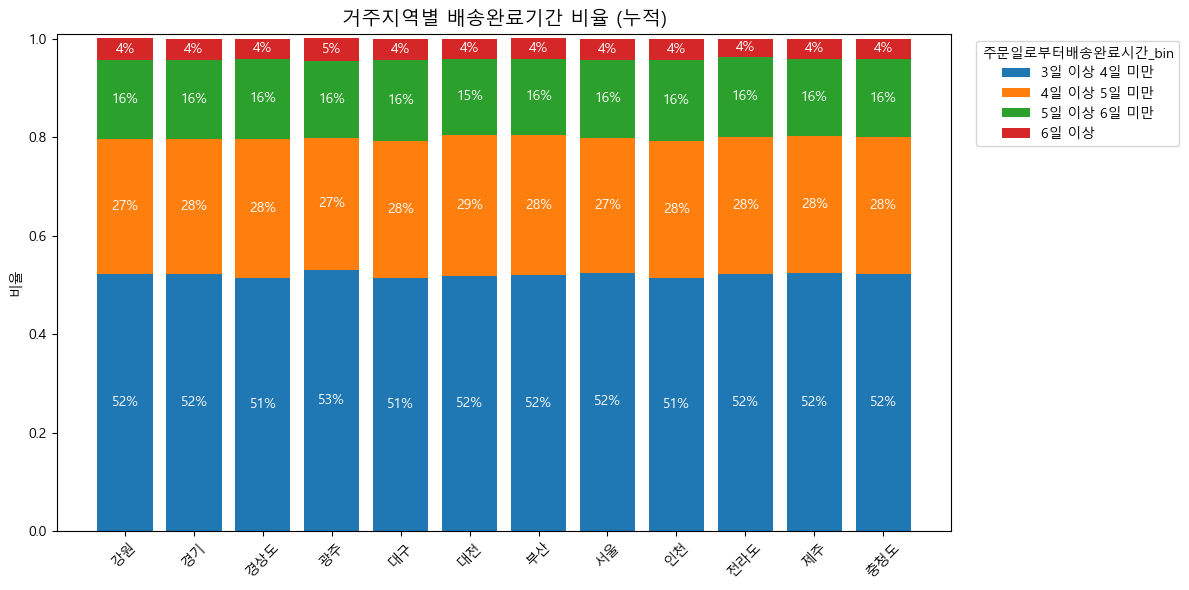

In [13]:
import matplotlib.pyplot as plt
import numpy as np

plt.rcParams['font.family']='Malgun Gothic'
# 교차표 생성
cross_tab = pd.crosstab(df['거주지역'], df['주문일로부터배송완료시간_bin'], normalize='index').round(3)

# 유효한 bin 순서
bin_order = ['1일 미만', '1일 이상 2일 미만', '2일 이상 3일 미만',
             '3일 이상 4일 미만', '4일 이상 5일 미만', '5일 이상 6일 미만', '6일 이상']
valid_bins = [b for b in bin_order if b in cross_tab.columns]
cross_tab = cross_tab[valid_bins]

# 누적 막대그래프
plt.figure(figsize=(12, 6))
bottom = np.zeros(len(cross_tab))
x = np.arange(len(cross_tab))
labels = cross_tab.index

for col in cross_tab.columns:
    height = cross_tab[col].values
    bars = plt.bar(x, height, bottom=bottom, label=col)
    for j, bar in enumerate(bars):
        if height[j] > 0.01:
            plt.text(bar.get_x() + bar.get_width() / 2,
                     bottom[j] + height[j] / 2,
                     f"{height[j]*100:.0f}%",
                     ha='center', va='center', fontsize=10, color='white')
    bottom += height

plt.xticks(x, labels, rotation=45)
plt.title('거주지역별 배송완료기간 비율 (누적)', fontsize=14)
plt.ylabel('비율')
plt.ylim(0, 1.01)
plt.legend(title='주문일로부터배송완료시간_bin', bbox_to_anchor=(1.02, 1), loc='upper left')
plt.tight_layout()
plt.show()


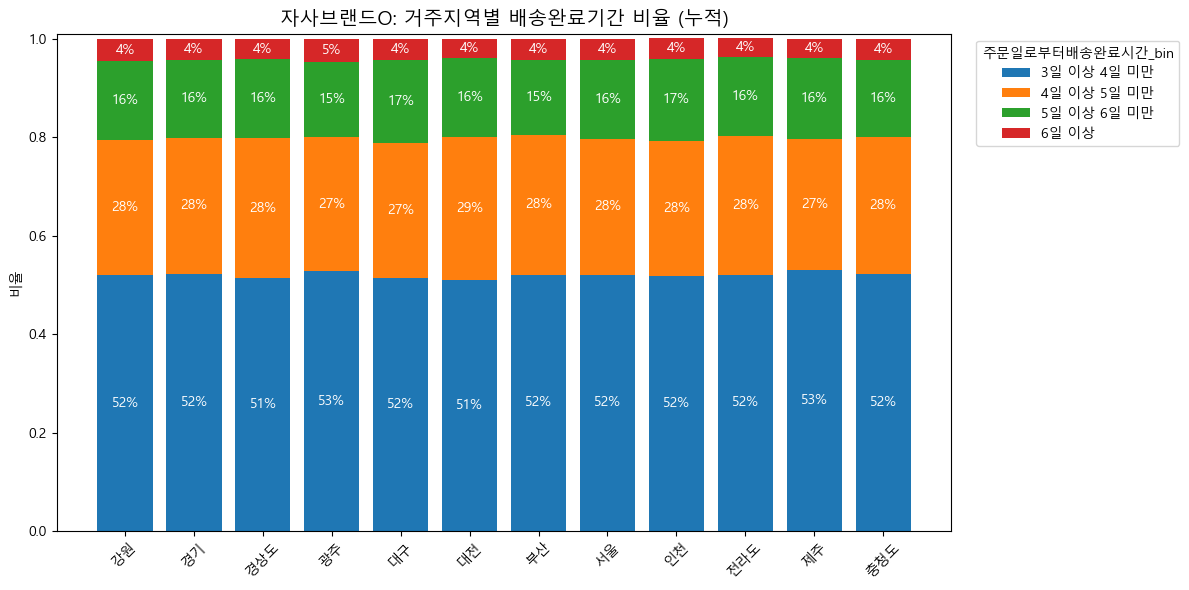

In [14]:
tab = df[df['자사브랜드유무'] == 1]
cross_tab = pd.crosstab(tab['거주지역'], tab['주문일로부터배송완료시간_bin'], normalize='index').round(3)
valid_bins = [b for b in bin_order if b in cross_tab.columns]
cross_tab = cross_tab[valid_bins]

plt.figure(figsize=(12, 6))
bottom = np.zeros(len(cross_tab))
x = np.arange(len(cross_tab))
labels = cross_tab.index

for col in cross_tab.columns:
    height = cross_tab[col].values
    bars = plt.bar(x, height, bottom=bottom, label=col)
    for j, bar in enumerate(bars):
        if height[j] > 0.01:
            plt.text(bar.get_x() + bar.get_width() / 2,
                     bottom[j] + height[j] / 2,
                     f"{height[j]*100:.0f}%",
                     ha='center', va='center', fontsize=10, color='white')
    bottom += height

plt.xticks(x, labels, rotation=45)
plt.title('자사브랜드O: 거주지역별 배송완료기간 비율 (누적)', fontsize=14)
plt.ylabel('비율')
plt.ylim(0, 1.01)
plt.legend(title='주문일로부터배송완료시간_bin', bbox_to_anchor=(1.02, 1), loc='upper left')
plt.tight_layout()
plt.show()

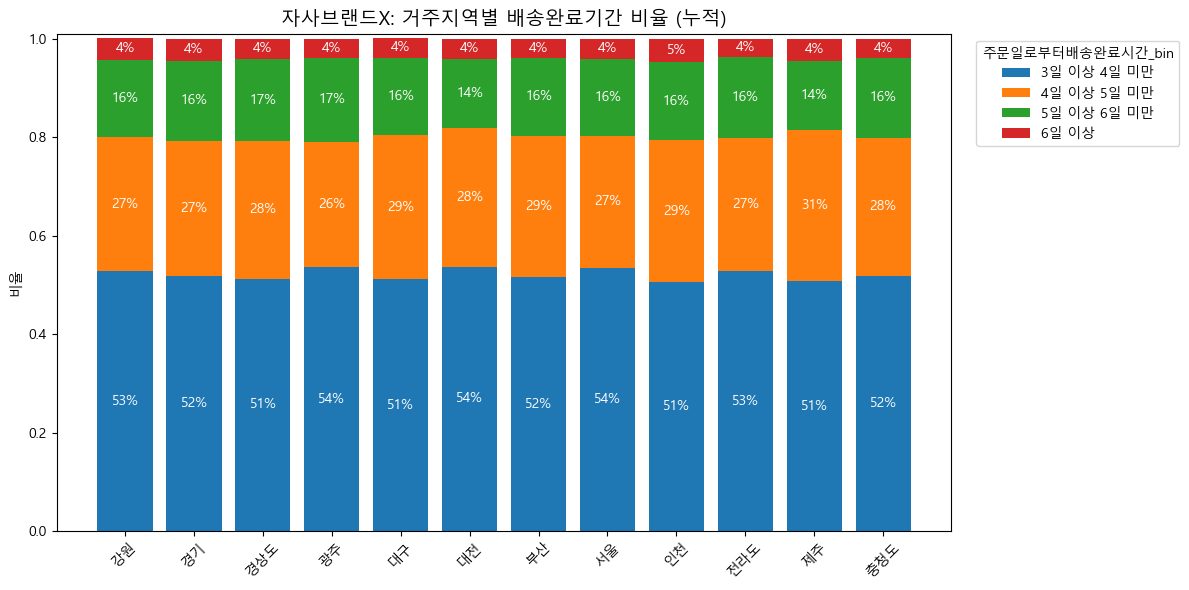

In [15]:
tab = df[df['자사브랜드유무'] == 0]
cross_tab = pd.crosstab(tab['거주지역'], tab['주문일로부터배송완료시간_bin'], normalize='index').round(3)
valid_bins = [b for b in bin_order if b in cross_tab.columns]
cross_tab = cross_tab[valid_bins]

plt.figure(figsize=(12, 6))
bottom = np.zeros(len(cross_tab))
x = np.arange(len(cross_tab))
labels = cross_tab.index

for col in cross_tab.columns:
    height = cross_tab[col].values
    bars = plt.bar(x, height, bottom=bottom, label=col)
    for j, bar in enumerate(bars):
        if height[j] > 0.01:
            plt.text(bar.get_x() + bar.get_width() / 2,
                     bottom[j] + height[j] / 2,
                     f"{height[j]*100:.0f}%",
                     ha='center', va='center', fontsize=10, color='white')
    bottom += height

plt.xticks(x, labels, rotation=45)
plt.title('자사브랜드X: 거주지역별 배송완료기간 비율 (누적)', fontsize=14)
plt.ylabel('비율')
plt.ylim(0, 1.01)
plt.legend(title='주문일로부터배송완료시간_bin', bbox_to_anchor=(1.02, 1), loc='upper left')
plt.tight_layout()
plt.show()


### 가설 : 쪼개기 배송으로 고객의 불만이 있을 것이다. -> 유의
- 전체 주문 중, 약 9%가 쪼개기 배송
- 고객들의 불만을 확인할 수가 없어서 추론을 해야 하는데 가능성 있는 가설 같음

In [11]:
# 1. 필요한 열만 선택
subset = df[['고객번호', '구매일', '배송완료일', '거주지역']].copy()

# 2. 고객번호 + 구매일 기준으로 배송완료일 개수 세기
delivery_count = subset.groupby(['고객번호', '구매일'])['배송완료일'].nunique().reset_index(name='배송완료일_고유개수')

# 3. 배송완료일이 2개 이상인 경우 필터링
multiple_deliveries = delivery_count[delivery_count['배송완료일_고유개수'] > 1]

# 4. 원래 df2에서 해당 행 추출
result = df.merge(multiple_deliveries[['고객번호', '구매일']], on=['고객번호', '구매일'], how='inner')

# 5. 중복 제거 및 정렬
같은고객_다른배송일 = result[['고객번호', '구매일', '배송완료일', '거주지역']].drop_duplicates().sort_values(['고객번호', '구매일'])

In [12]:
print(f'전체 주문 중 {len(같은고객_다른배송일) / df['주문번호'].nunique() * 100:.2f}%의 주문에서 쪼개기 배송이 발생했습니다.')

전체 주문 중 9.14%의 주문에서 쪼개기 배송이 발생했습니다.


- 지역별 쪼개기 배송건수

In [13]:
# 지역별 건수
region_counts = 같은고객_다른배송일['거주지역'].value_counts().reset_index()
region_counts.columns = ['거주지역', '건수']

# 전체 건수
total = region_counts['건수'].sum()

# 비율 추가
region_counts['비율(%)'] = (region_counts['건수'] / total * 100).round(2)
region_counts

,거주지역,건수,비율(%)
0,경기,3088,19.20
1,충청도,2946,18.32
2,서울,2676,16.64
3,강원,1378,8.57
4,경상도,1365,8.49
5,부산,1351,8.40
6,전라도,896,5.57
7,인천,744,4.63
8,대전,588,3.66
9,대구,442,2.75


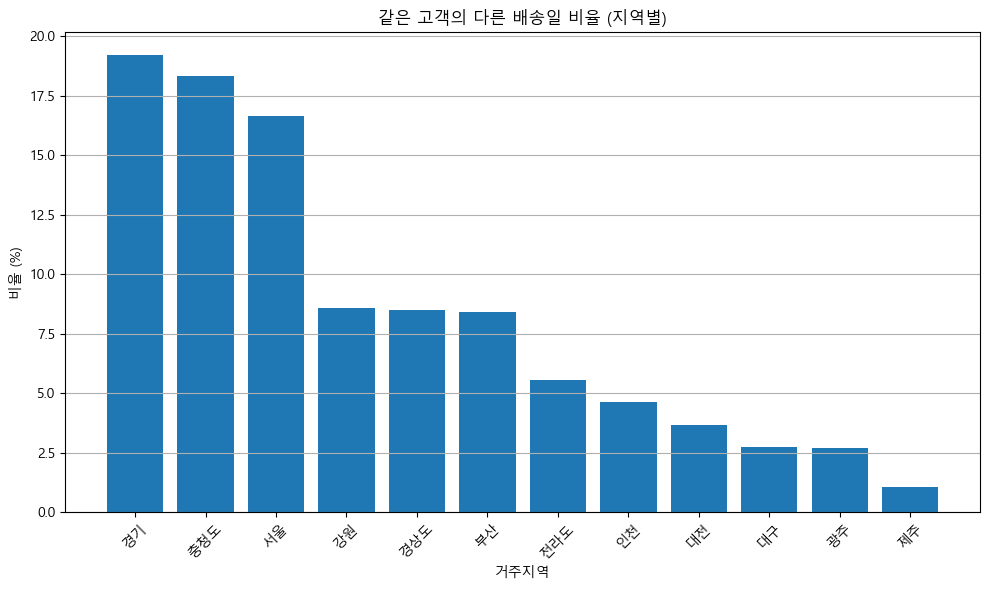

In [14]:
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
import platform

# ✅ 한글 폰트 설정
if platform.system() == 'Windows':
    plt.rcParams['font.family'] = 'Malgun Gothic'  # 윈도우 기본 한글폰트
else:
    plt.rcParams['font.family'] = 'AppleGothic'  # macOS
plt.rcParams['axes.unicode_minus'] = False  # 마이너스 깨짐 방지

plt.figure(figsize=(10, 6))
plt.bar(region_counts['거주지역'], region_counts['비율(%)'])
plt.title('같은 고객의 다른 배송일 비율 (지역별)')
plt.xlabel('거주지역')
plt.ylabel('비율 (%)')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.tight_layout()
plt.show()

### 그럼 쪼개기 배송은 며칠 간격으로 발생했는가?

In [16]:
# 1. 같은 고객 + 같은 날 구매한 그룹 중 배송완료일이 2개 이상인 경우만
subset = df[['고객번호', '구매일', '배송완료일']].copy()

# 2. 배송완료일 차이 계산 (그룹별 최대 - 최소)
delivery_gap = subset.groupby(['고객번호', '구매일'])['배송완료일'].agg(['min', 'max']).reset_index()
delivery_gap['배송일_차이_일'] = (delivery_gap['max'] - delivery_gap['min']).dt.days

# 3. 배송일 차이가 있는 경우만 필터링 (즉, 차이가 1일 이상인 경우)
delivery_gap_filtered = delivery_gap[delivery_gap['배송일_차이_일'] > 0]

# 결과 확인
delivery_gap_filtered.sort_values('배송일_차이_일', ascending=False).head()

,고객번호,구매일,min,max,배송일_차이_일
69331,201904130869636,2022-09-30,2022-10-03,2022-10-07,4
12581,201901190767903,2023-03-15,2023-03-18,2023-03-22,4
9761,201901160763163,2022-03-14,2022-03-17,2022-03-21,4
16844,201901250774327,2022-12-07,2022-12-10,2022-12-14,4
12529,201901190767833,2022-03-11,2022-03-14,2022-03-18,4


In [17]:
# 배송일 차이별 건수 집계
gap_counts = delivery_gap_filtered['배송일_차이_일'].value_counts().sort_index().reset_index()
gap_counts.columns = ['배송일_차이_일', '건수']

# 출력
print(gap_counts)

   배송일_차이_일    건수
0         1  4656
1         2  2982
2         3   178
3         4    34


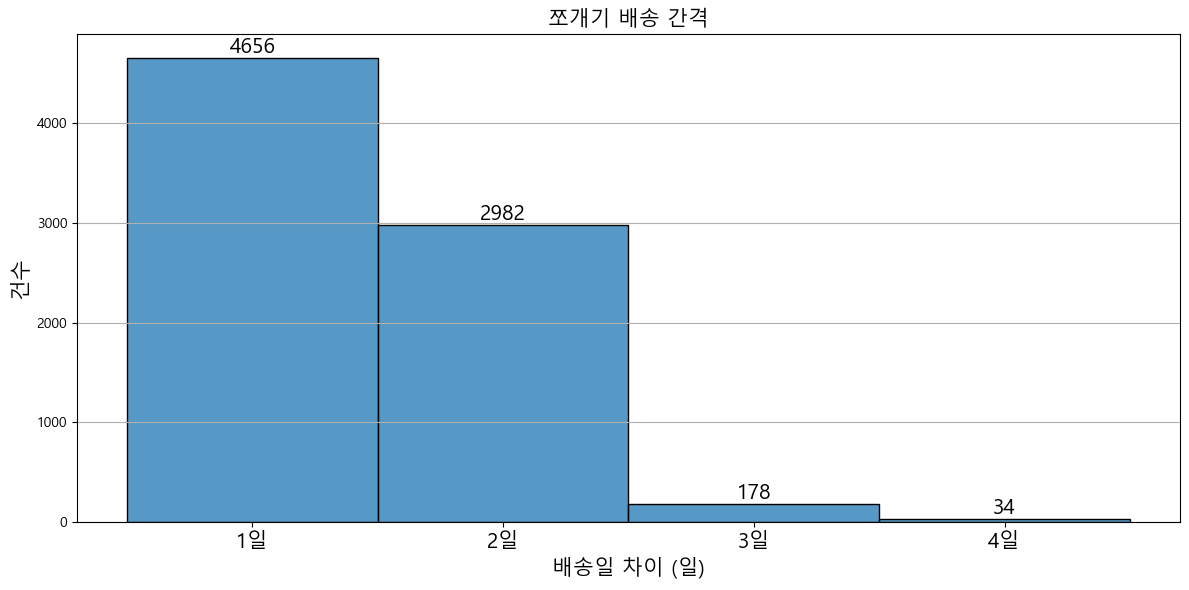

In [18]:
import seaborn as sns
plt.figure(figsize=(12, 6))
ax = sns.histplot(delivery_gap_filtered['배송일_차이_일'], bins=range(1, delivery_gap_filtered['배송일_차이_일'].max() + 2), discrete=True)

# 막대 위에 건수 표시
for p in ax.patches:
    height = int(p.get_height())
    if height > 0:
        ax.annotate(f'{height}', 
                    (p.get_x() + p.get_width() / 2., height),
                    ha='center', va='bottom', fontsize=15)

plt.title('쪼개기 배송 간격', fontsize=15)
plt.xlabel('배송일 차이 (일)', fontsize=15)
plt.ylabel('건수', fontsize=15)
plt.xticks(ticks=range(1, 5),  labels=['1일', '2일', '3일', '4일'], fontsize=15)
plt.grid(axis='y')
plt.tight_layout()
plt.show()

- 1일이 가장 많고, 2일까지도 많이 발생하였고 간간히 3, 4일도 발생함
- 로켓배송이 많아진 시점에 이렇게 차이나는 배송일 간격이 M사를 이용하는 고객들의 배송 불만이 발생했을 것으로 추정